# Import Packages

In [2]:
!pip install seaborn

     |████████████████████████████████| 296kB 4.2MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 80.2MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 59.0MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 50.8MB/s eta 0:00:01
     |████████████████████████████████| 348kB 83.7MB/s eta 0:00:01
     |████████████████████████████████| 512kB 76.1MB/s eta 0:00:01
     |████████████████████████████████| 235kB 88.0MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 62.8MB/s eta 0:00:01
     |████████████████████████████████| 61kB 81.3MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 77.0MB/s eta 0:00:01
     |████████████████████████████████| 4.5MB 69.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 85.5MB/s eta 0:00:01
     |████████████████████████████████| 112kB 89.9MB/s eta 0:00:01
ERROR: refractio 2.1.5.4 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: mlflow 2.10.0 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Scaling
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split
# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn import metrics
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')
#Packages imported...
#!pip install torch

Matplotlib created a temporary cache directory at /tmp/matplotlib-r5xjhgkx because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


ModuleNotFoundError: No module named 'seaborn'

# Reading Data

In [4]:
df = pd.read_csv("C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/Final_Data_36_Month_New_Old_classification.csv",encoding='latin-1')
#print(df.head(1))
#print(df.describe)
#print(df.columns)
print(df.shape)


(17797, 32)


# Renaming the Columns

In [5]:
#df.rename(columns = {'ï»¿Date':'Dates','Date':'Dates','Value (in 1000)':'Sales','Volume (in 1000 KG)':'Volume','Units (in 1000 ITEM)':'Unit'}, inplace = True)
df.rename(columns = {'ï»¿Dates':'Dates', 'Value (in 1000)':'Sales','Volume (in 1000 KG)':'Volume','Units (in 1000 ITEM)':'Unit'}, inplace = True)
print(df.columns)
#type(df[['Dates']])

Index(['Dates', 'MARKT_HIER_SHORT', 'MARKT_HIER_LONG', 'MARKT_HIER_LEVEL_NAME',
       'PROD_HIER_SHORT', 'PROD_HIER_LEVEL_NAME', 'Category', 'PACK SIZE',
       'PRODUCT TYPE', 'MANUFACTURER', 'BRAND', 'SUB-BRAND', 'VARIANT',
       'Prod_Variant_Hier', 'Unit', 'Volume', 'Sales', 'New Product Included',
       'Price', 'No of Manufacturers', 'No of Brands', 'No of Sub Brands',
       'No of Pack Sizes', 'No of Regions', 'Price_last_month',
       'Sales_last_month', 'Volume_last_month', 'Qty_last_month',
       'Sales_last_2_month', 'Volume_last_2_month', 'Qty_last_2_month',
       'Price_last_2_month'],
      dtype='object')


# Aggreagating and Grouping the Data at Market and Product Hierarchy

In [6]:
df = df.groupby(['MARKT_HIER_LONG','Category','PRODUCT TYPE','VARIANT','Dates']).agg({'Price': 'mean','Unit': 'sum',
    'Volume' : 'sum', 'Sales': 'sum','New Product Included' : 'mean',
       'Price': 'mean', 'No of Manufacturers': 'mean', 'No of Brands': 'mean', 'No of Sub Brands': 'mean',
       'No of Pack Sizes': 'mean', 'No of Regions': 'mean', 'Price_last_month': 'mean',
       'Sales_last_month': 'sum', 'Volume_last_month': 'sum', 'Qty_last_month': 'sum',
       'Sales_last_2_month': 'sum', 'Volume_last_2_month': 'sum', 'Qty_last_2_month': 'sum',
       'Price_last_2_month': 'mean'},dropna=False).reset_index()

cols = ['Price_last_month','Sales_last_month', 'Volume_last_month', 'Qty_last_month',
       'Sales_last_2_month','Volume_last_2_month', 'Qty_last_2_month',
       'Price_last_2_month']
df[cols] = df[cols].replace({0:np.nan}) 
df.dropna(subset=['Price_last_month','Sales_last_month', 'Volume_last_month', 'Qty_last_month',
       'Sales_last_2_month','Volume_last_2_month', 'Qty_last_2_month',
       'Price_last_2_month'], inplace=True)
df['Dates'] = pd.to_datetime(df['Dates'],format='%d-%m-%Y')
df = df.sort_values(by=['Dates'])
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#while grouping in pandas it replace null by zero, how to avoid that
#df.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/data_Grouped_{current_time}.csv",index=False)

# Understanding the data

# The shape of the data

In [7]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (4590, 23)


# Preview of the first 5 rows of the data

In [8]:
df.head(5)

,MARKT_HIER_LONG,Category,PRODUCT TYPE,VARIANT,Dates,Price,Unit,Volume,Sales,New Product Included,...,No of Pack Sizes,No of Regions,Price_last_month,Sales_last_month,Volume_last_month,Qty_last_month,Sales_last_2_month,Volume_last_2_month,Qty_last_2_month,Price_last_2_month
846,TOTAL WEST - OTHER WEST PROVINCE 1,Beverages,Energy Drinks,Decaf,2021-05-01,5.241176,170,235,891,0.0,...,1.0,2.0,5.241176,891.0,235.0,170.0,891.0,235.0,170.0,5.241176
217,TOTAL WEST - OTHER WEST PROVINCE 1,Beverages,Carbonated Soft Drinks,Cream Soda,2021-05-01,8.855596,1108,14611,9812,0.0,...,1.0,2.0,8.855596,9812.0,14611.0,1108.0,9812.0,14611.0,1108.0,8.855596
1987,TOTAL WEST - OTHER WEST PROVINCE 1,Beverages,Sports Drinks,Orange Mango,2021-05-01,2.622733,8050,23925,21113,0.0,...,1.0,2.0,2.622733,21113.0,23925.0,8050.0,21113.0,23925.0,8050.0,2.622733
2790,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Carbonated Soft Drinks,Diet,2021-05-01,12.148698,3302,1874,40115,0.0,...,1.0,2.0,12.148698,40115.0,1874.0,3302.0,40115.0,1874.0,3302.0,12.148698
2601,TOTAL WEST - OTHER WEST PROVINCE 2,Beverages,Bottled Water,Regular,2021-05-01,31.764706,34,26,1080,0.0,...,1.0,1.0,31.764706,1080.0,26.0,34.0,1080.0,26.0,34.0,31.764706


# Checking the number of unique values in each column

In [9]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
MARKT_HIER_LONG,2
Category,1
PRODUCT TYPE,9
VARIANT,64
Dates,38
Price,4566
Unit,4354
Volume,4286
Sales,4566
New Product Included,2


#  Separating the columns in categorical and continuous

In [10]:
cat_cols = ['MARKT_HIER_LONG', 'Category', 'PRODUCT TYPE', 'VARIANT','No of Manufacturers', 'No of Brands', 'No of Sub Brands',
       'No of Pack Sizes', 'No of Regions']
con_cols = ['Price', 'Unit', 'Volume', 'Sales','Price_last_month',
       'Sales_last_month', 'Volume_last_month', 'Qty_last_month',
       'Sales_last_2_month', 'Volume_last_2_month', 'Qty_last_2_month',
       'Price_last_2_month']
target_col = ["New Product Included"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['MARKT_HIER_LONG', 'Category', 'PRODUCT TYPE', 'VARIANT', 'No of Manufacturers', 'No of Brands', 'No of Sub Brands', 'No of Pack Sizes', 'No of Regions']
The continuous cols are :  ['Price', 'Unit', 'Volume', 'Sales', 'Price_last_month', 'Sales_last_month', 'Volume_last_month', 'Qty_last_month', 'Sales_last_2_month', 'Volume_last_2_month', 'Qty_last_2_month', 'Price_last_2_month']
The target variable is :   ['New Product Included']


# Summary statistics

In [11]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,4590.0,14.446891,1.122489e+01,0.494382,7.501026,11.555966,18.293824,7.563653e+01
Unit,4590.0,390773.674946,1.140182e+06,3.000000,5267.250000,31584.500000,147526.000000,1.316561e+07
Volume,4590.0,97030.791285,2.015687e+05,15.000000,7711.500000,22305.500000,65772.500000,1.356425e+06
Sales,4590.0,919324.223965,1.956215e+06,2.000000,51809.250000,218598.500000,702445.000000,2.058970e+07
Price_last_month,4590.0,14.183271,1.121503e+01,0.365386,7.154096,11.352549,17.931747,7.563653e+01
Sales_last_month,4590.0,892935.431808,1.911369e+06,2.000000,50063.750000,210106.000000,663716.000000,2.057429e+07
Volume_last_month,4590.0,96712.951416,2.011282e+05,15.000000,7581.250000,21895.000000,65495.500000,1.356425e+06
Qty_last_month,4590.0,382435.630283,1.115625e+06,3.000000,5141.000000,30573.000000,141226.500000,1.282177e+07
Sales_last_2_month,4590.0,890294.671242,1.911144e+06,2.000000,48932.250000,205919.500000,661013.250000,2.057429e+07
Volume_last_2_month,4590.0,96557.433115,2.013082e+05,15.000000,7522.750000,21677.500000,65101.500000,1.356425e+06


#  Missing values

In [12]:
df.isnull().sum()

MARKT_HIER_LONG         0
Category                0
PRODUCT TYPE            0
VARIANT                 0
Dates                   0
Price                   0
Unit                    0
Volume                  0
Sales                   0
New Product Included    0
No of Manufacturers     0
No of Brands            0
No of Sub Brands        0
No of Pack Sizes        0
No of Regions           0
Price_last_month        0
Sales_last_month        0
Volume_last_month       0
Qty_last_month          0
Sales_last_2_month      0
Volume_last_2_month     0
Qty_last_2_month        0
Price_last_2_month      0
dtype: int64

# Count plot of target

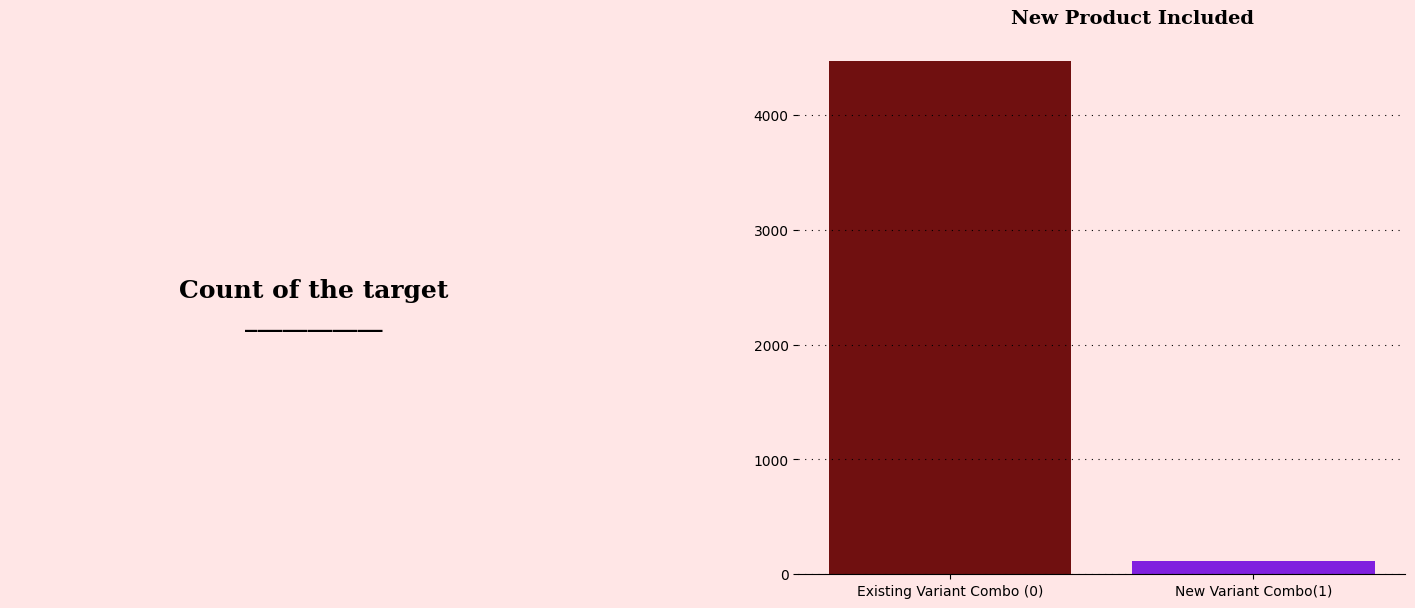

In [15]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.20,4800,"New Product Included",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'New Product Included',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Existing Variant Combo (0)","New Variant Combo(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Correlation matrix of continuous features

In [16]:
df_corr = df[con_cols].corr().transpose()
df_corr

,Price,Unit,Volume,Sales,Price_last_month,Sales_last_month,Volume_last_month,Qty_last_month,Sales_last_2_month,Volume_last_2_month,Qty_last_2_month,Price_last_2_month
Price,1.000000,-0.056913,0.163523,0.191710,0.917907,0.153031,0.159782,-0.064537,0.142873,0.159054,-0.062388,0.883994
Unit,-0.056913,1.000000,0.788348,0.639773,-0.066025,0.588423,0.777374,0.932367,0.600751,0.779956,0.953639,-0.066497
Volume,0.163523,0.788348,1.000000,0.877558,0.147941,0.857939,0.995412,0.775225,0.855003,0.994716,0.781129,0.137762
Sales,0.191710,0.639773,0.877558,1.000000,0.169998,0.850003,0.851528,0.582216,0.796571,0.845565,0.591170,0.149673
Price_last_month,0.917907,-0.066025,0.147941,0.169998,1.000000,0.169061,0.149504,-0.063516,0.136329,0.144858,-0.068603,0.922593
Sales_last_month,0.153031,0.588423,0.857939,0.850003,0.169061,1.000000,0.880914,0.647433,0.859660,0.856350,0.591685,0.146815
Volume_last_month,0.159782,0.777374,0.995412,0.851528,0.149504,0.880914,1.000000,0.786405,0.863761,0.995878,0.779726,0.139114
Qty_last_month,-0.064537,0.932367,0.775225,0.582216,-0.063516,0.647433,0.786405,1.000000,0.595296,0.775899,0.935843,-0.067807
Sales_last_2_month,0.142873,0.600751,0.855003,0.796571,0.136329,0.859660,0.863761,0.595296,1.000000,0.884630,0.649977,0.149535
Volume_last_2_month,0.159054,0.779956,0.994716,0.845565,0.144858,0.856350,0.995878,0.775899,0.884630,1.000000,0.790102,0.139308


# Plotting Correlation Matrix

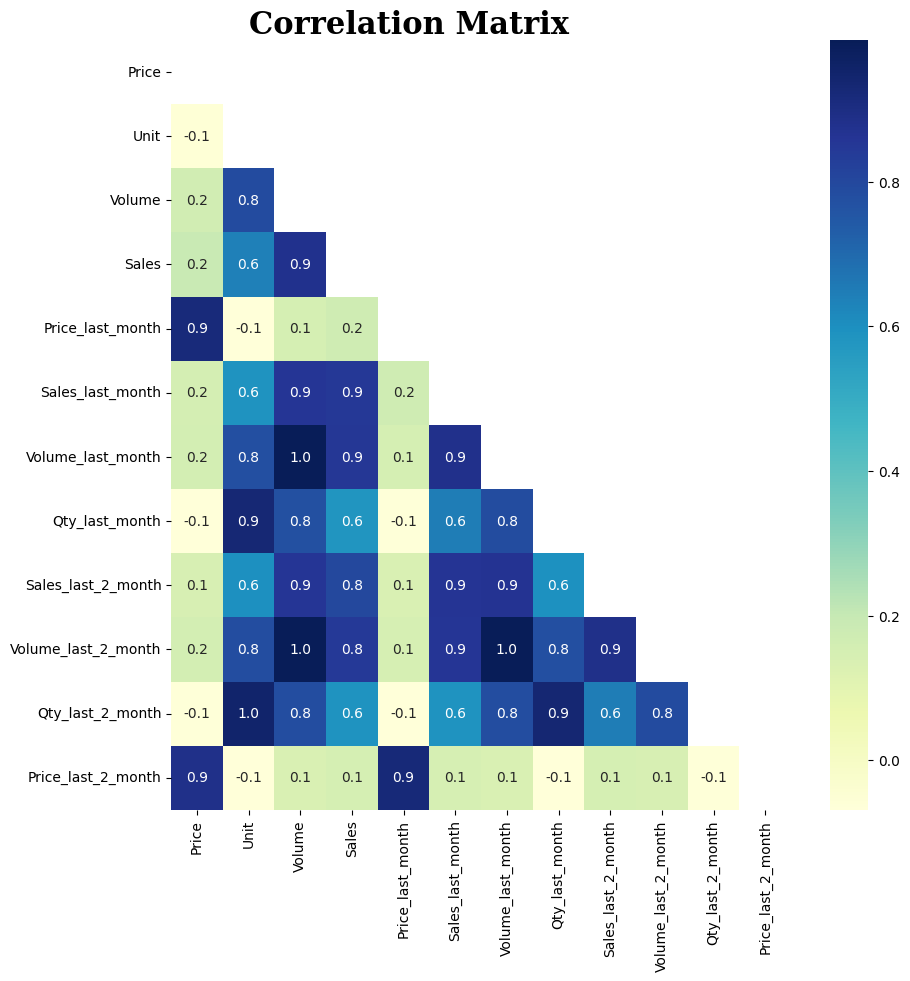

In [17]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

#  Scaling and Encoding features

In [18]:
# creating a copy of df
df1 = df
df1= df1.drop(['Dates'],axis=1)

# define the columns to be encoded and scaled
cat_cols = ['MARKT_HIER_LONG', 'Category', 'PRODUCT TYPE', 'VARIANT']
con_cols = ['Price', 'Unit', 'Volume', 'Sales','Price_last_month',
       'Sales_last_month', 'Volume_last_month', 'Qty_last_month',
       'Sales_last_2_month', 'Volume_last_2_month', 'Qty_last_2_month',
       'Price_last_2_month','No of Manufacturers', 'No of Brands', 'No of Sub Brands',
       'No of Pack Sizes', 'No of Regions']

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['New Product Included'],axis=1)
y = df1[['New Product Included']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
print(X.head(5))
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#X.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/Scaled_encoded_{current_time}.csv",index=False)
#The first 5 rows of

The first 5 rows of X are
         Price      Unit    Volume     Sales  No of Manufacturers  \
846  -0.585093 -0.220826 -0.380126 -0.334607                  0.0   
217  -0.250201 -0.214233 -0.132524 -0.320896                  0.0   
1987 -0.827703 -0.165434  0.027893 -0.303527                  0.0   
2790  0.054919 -0.198810 -0.351897 -0.274322                  0.0   
2601  1.872428 -0.221782 -0.383726 -0.334317                  0.0   

      No of Brands  No of Sub Brands  No of Pack Sizes  No of Regions  \
846            0.0               0.0         -0.333333            0.0   
217            0.0               0.0         -0.333333            0.0   
1987           0.0               0.0         -0.333333            0.0   
2790           0.0               0.0         -0.333333            0.0   
2601           0.0               0.0         -0.333333           -1.0   

      Price_last_month  ...  VARIANT_Revive  VARIANT_Rise  VARIANT_Root Beer  \
846          -0.567041  ...           Fa

# Dealing with Class Imbalance problem by oversampling the minority class

In [19]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
#print(X_res.head(5))
print("The shape of X_res is      ", X_res.shape)
print("The shape of y_res is       ",y_res.shape)
print("The shape of X_res is      ", X.shape)
print("The shape of y_res is       ",y.shape)
#print(y_res.head(5))
current_time = pd.Timestamp.now().strftime('%d-%m-%Y %H_%M_%S')
#X_res.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_X_res_{current_time}.csv",index=False)
#y.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_y_res_{current_time}.csv",index=False)
# Now X_res and y_res have a balanced class distribution
res2 = pd.concat([X_res, y_res], axis=1, join='inner')
#res2.to_csv(f"C:/Users/10675048/OneDrive - LTIMindtree/CPG DOMAIN/Sample Data/NPD Data/DataFrame_res2_{current_time}.csv",index=False)

The shape of X_res is       (8944, 89)
The shape of y_res is        (8944, 1)
The shape of X_res is       (4590, 89)
The shape of y_res is        (4590, 1)


# Plotting Output after balancing the class

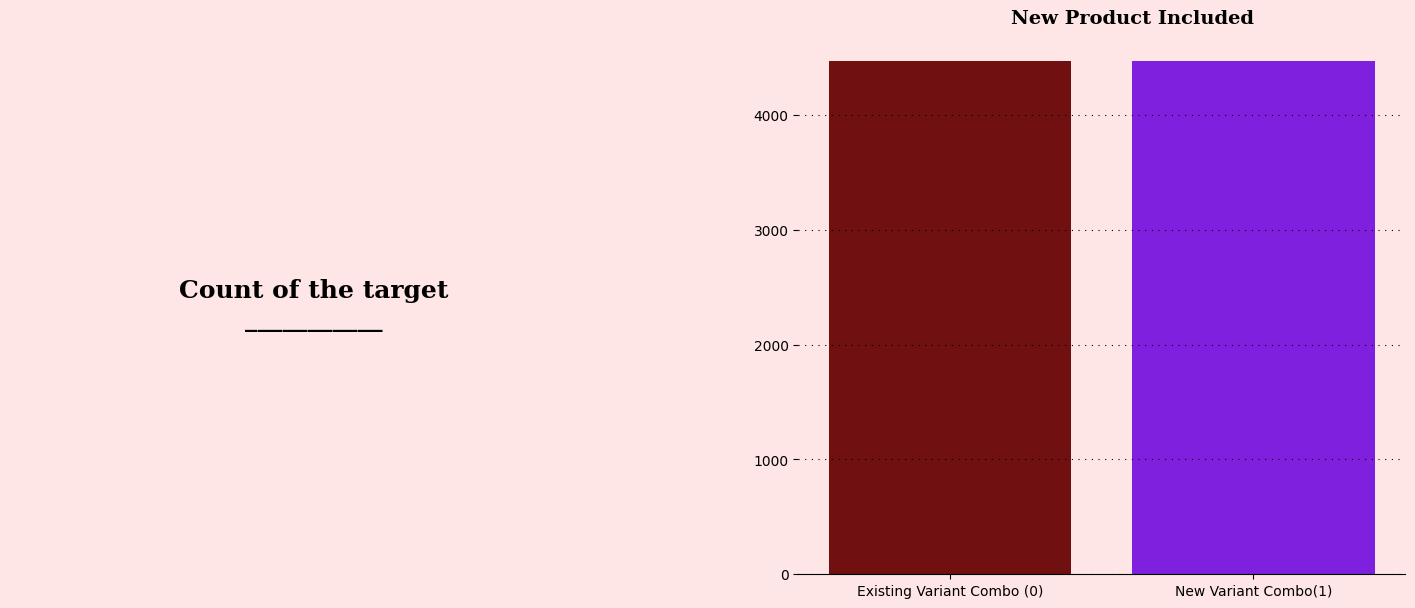

In [20]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.20,4800,"New Product Included",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=y_res, x = 'New Product Included',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Existing Variant Combo (0)","New Variant Combo(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

# Train and test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (7155, 89)
The shape of X_test is        (1789, 89)
The shape of y_train is       (7155, 1)
The shape of y_test is        (1789, 1)


# Linear Classifiers

# Support Vector Machines

The test accuracy score of SVM is  0.8798211291224147


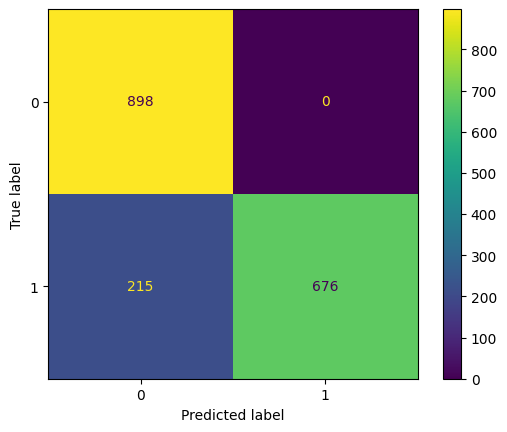

{'Accuracy': 0.8798211291224147, 'Precision': 1.0, 'Sensitivity_recall': 0.7586980920314254, 'Specificity': 1.0, 'F1_score': 0.8627951499680919}


In [28]:
# instantiating the object and fitting
#clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train, y_train)
# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


# Logistic Regression


The test accuracy score of Logistric Regression is  0.864169927333706


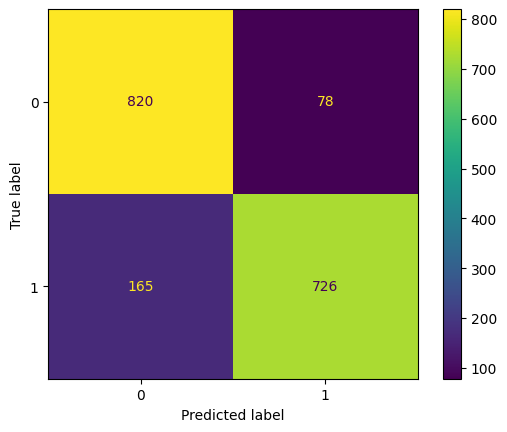

{'Accuracy': 0.864169927333706, 'Precision': 0.9029850746268657, 'Sensitivity_recall': 0.8148148148148148, 'Specificity': 0.9131403118040089, 'F1_score': 0.856637168141593}


In [25]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))


# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


# ROC Curve

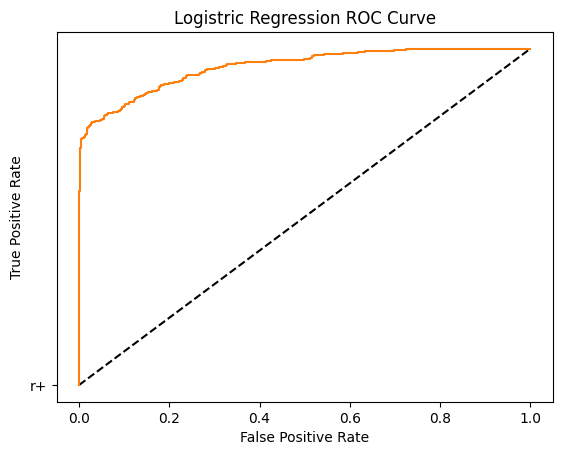

In [26]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

# Decision Tree

The test accuracy score of Decision Tree is  0.9301285634432644


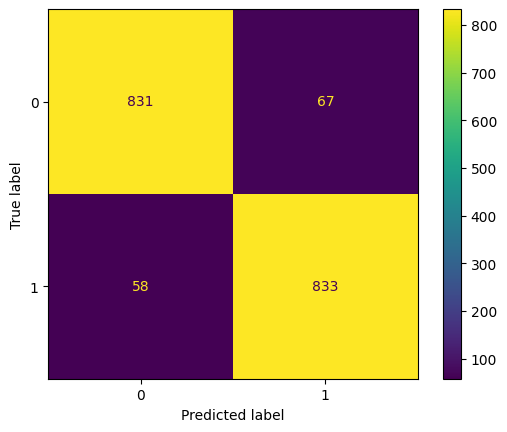

{'Accuracy': 0.9301285634432644, 'Precision': 0.9255555555555556, 'Sensitivity_recall': 0.9349046015712682, 'Specificity': 0.9253897550111359, 'F1_score': 0.9302065884980458}


In [24]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

# Random Forest

The test accuracy score of Random Forest is  0.9849077697037452


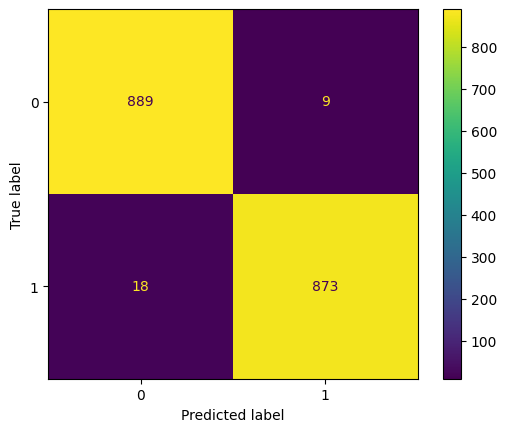

{'Accuracy': 0.9849077697037452, 'Precision': 0.9897959183673469, 'Sensitivity_recall': 0.9797979797979798, 'Specificity': 0.9899777282850779, 'F1_score': 0.9847715736040609}


In [23]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:

from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assume 'rf_model' is your pre-trained Random Forest model
# 'X_train', 'y_train' are your training features and labels
# 'X_val', 'y_val' are your validation features and labels
# 'feature_names' is a list of your feature names

# 1. Cross-Validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")

# 2. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation accuracy')
plt.xlabel('Number of training instances')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

# 3. Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# 4. External Validation
val_accuracy = rf_model.score(X_val, y_val)
print(f"Validation accuracy on external set: {val_accuracy}")

# 5. Model Complexity and Regularization
# Adjust hyperparameters (e.g., max_depth, n_estimators) to control model complexity
# Consider using GridSearchCV or RandomizedSearchCV to find optimal hyperparameters
# Regularization techniques (e.g., min_samples_split, min_samples_leaf) can also help prevent overfitting


In [29]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier

# Assume 'rf_model' is your pre-trained Random Forest model
# 'X_train', 'y_train' are your training features and labels
# 'X_val', 'y_val' are your validation features and labels
# 'feature_names' is a list of your feature names

# 1. Cross-Validation
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")


Cross-validation scores: [0.98043326 0.9881202  0.97554158 0.97903564 0.98113208]


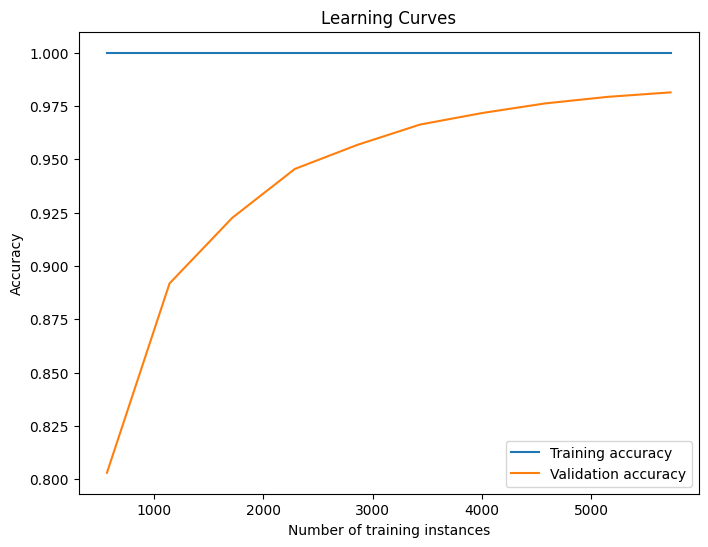

In [31]:
# 2. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation accuracy')
plt.xlabel('Number of training instances')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

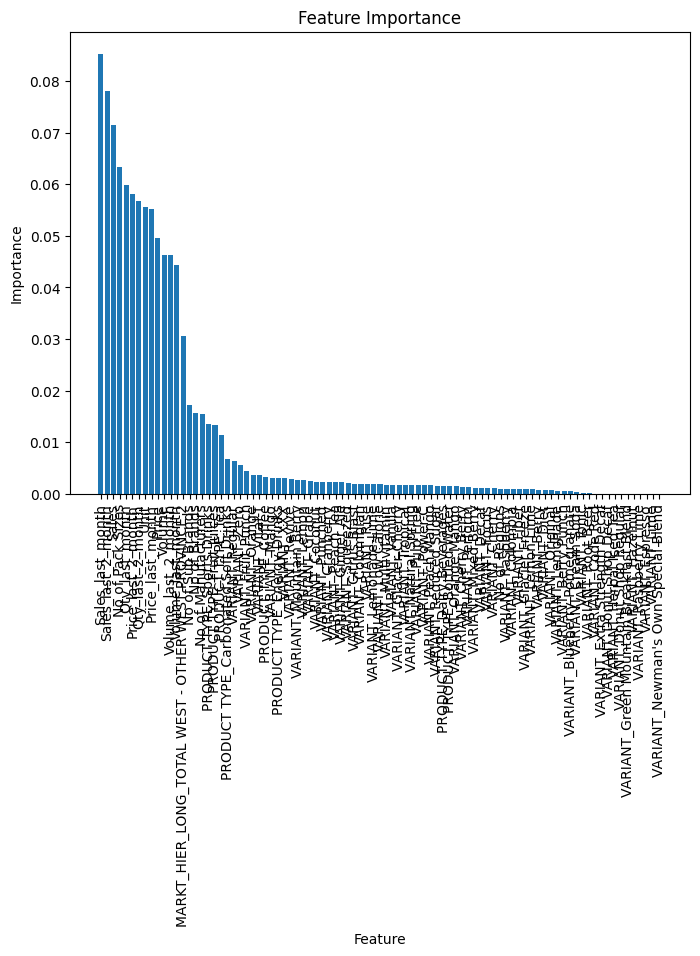

In [34]:
# 3. Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_names)), importances[indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [37]:
# 4. External Validation
val_accuracy = rf.score(X_test, y_test)
print(f"Validation accuracy on external set: {val_accuracy}")

Validation accuracy on external set: 0.9849077697037452


# Gradient Boosting Classifier - without tuning

The test accuracy score of Gradient Boosting Classifier is  0.7909446618222471


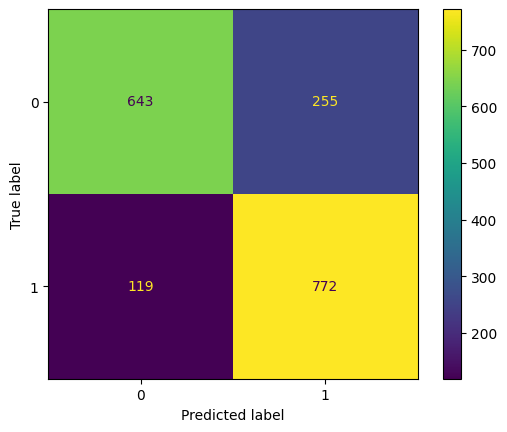

{'Accuracy': 0.7909446618222471, 'Precision': 0.7517039922103214, 'Sensitivity_recall': 0.8664421997755332, 'Specificity': 0.7160356347438753, 'F1_score': 0.8050052137643379}


In [27]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

# finding confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy : ", Accuracy)
Precision = metrics.precision_score(y_test, y_pred)
#print("Precision : ", Precision)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
#print("Sensitivity_recall : ", Sensitivity_recall)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
#print("Specificity : ", Specificity)
F1_score = metrics.f1_score(y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})